In [33]:
# Importing the data

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import accuracy_score

In [34]:
# Only normal data
data_normal = pd.read_csv("/kaggle/input/faults-data/normal.csv")
data_normal.head()
data_normal.describe()

,V,I,G,P,no_module_fault,fault,partial_shading
count,6330.000000,6330.000000,6330.000000,6330.000000,6330.0,6330.0,6330.0
mean,138.734933,9.739838,831.558621,1351.162537,0.0,0.0,0.0
std,1.809876,0.088144,1.902659,14.429356,0.0,0.0,0.0
min,132.175380,9.489920,825.585240,1291.955936,0.0,0.0,0.0
25%,137.572880,9.670472,830.585680,1342.380659,0.0,0.0,0.0
50%,138.774200,9.738865,831.730520,1351.460346,0.0,0.0,0.0
75%,139.927275,9.810010,832.698008,1360.264018,0.0,0.0,0.0
max,145.422990,10.024470,836.684810,1403.175089,0.0,0.0,0.0


In [35]:
# LL1
data_LL1 = pd.read_csv("/kaggle/input/faults-data/LL1.csv")
data_LL1.head()

,V,I,G,P,no_module_fault,fault,partial_shading
0,136.94052,9.98591,844.63360,1367.475708,0,0,0
1,139.04534,9.95746,844.76560,1384.538411,0,0,0
2,138.92868,9.94529,844.78838,1381.686012,0,0,0
3,138.17504,9.97574,844.73537,1378.398274,0,0,0
4,137.07915,10.03791,844.57462,1375.988171,0,0,0


In [36]:
# LL2
data_LL2 = pd.read_csv("/kaggle/input/faults-data/LL2.csv")
data_LL2.head()

,V,I,G,P,no_module_fault,fault,partial_shading
0,138.86004,10.15294,854.13382,1409.837655,0,0,0
1,135.23928,10.13656,854.20791,1370.861076,0,0,0
2,135.21717,10.11622,854.19620,1367.886639,0,0,0
3,136.81423,10.11374,853.97713,1383.703551,0,0,0
4,137.08330,10.14169,854.12744,1390.256333,0,0,0


In [37]:
# Str1_3-Str2_2-LL1
data_LL1_str = pd.read_csv("/kaggle/input/faults-data/Str1_3-Str2_2-LL1.csv")
data_LL1_str.head()

,V,I,G,P,no_module_fault,fault,partial_shading
0,135.91478,10.54864,893.40683,1433.716085,0,0,0
1,135.63063,10.54657,893.54288,1430.437933,0,0,0
2,137.20148,10.55892,893.59781,1448.699451,0,0,0
3,138.06698,10.55964,893.53585,1457.937605,0,0,0
4,135.96772,10.54959,893.60419,1434.403699,0,0,0


In [38]:
# Partial Shading
data_partial = pd.read_csv("/kaggle/input/faults-data/Partial_shading.csv")
data_partial.head()

,V,I,G,P,no_module_fault,fault,partial_shading
0,137.40550,10.59720,901.18359,1456.113565,0,0,0
1,135.50167,10.58743,901.22830,1434.614446,0,0,0
2,135.91852,10.60657,901.19254,1441.629297,0,0,0
3,136.19315,10.59002,901.34114,1442.288182,0,0,0
4,138.90170,10.55392,901.28089,1465.957430,0,0,0


In [39]:
from sklearn.model_selection import train_test_split

# Splitting the data to append all training data together and to test remaining data separately
train_normal, test_normal = train_test_split(data_normal, test_size=0.2)
train_LL1, test_LL1 = train_test_split(data_LL1, test_size=0.2)
train_LL2, test_LL2 = train_test_split(data_LL2, test_size=0.2)
train_LL1_str, test_LL1_str = train_test_split(data_LL1_str, test_size=0.2)
train_partial, test_partial = train_test_split(data_partial, test_size=0.2)

In [40]:
# Appending all training data
train_total = pd.concat([train_normal, train_LL1, train_LL2, train_LL1_str, train_partial], ignore_index=True)
train_total.describe()
# train_total.head()

,V,I,G,P,no_module_fault,fault,partial_shading
count,45520.000000,45520.000000,45520.000000,45520.000000,45520.000000,45520.000000,45520.000000
mean,139.566237,9.171403,865.901785,1278.053544,0.451516,0.298682,0.101999
std,2.610221,1.210388,26.894939,156.003506,0.743861,0.457685,0.302650
min,128.633120,7.057530,825.585240,986.645824,0.000000,0.000000,0.000000
25%,137.747600,7.836968,841.564580,1122.647830,0.000000,0.000000,0.000000
50%,139.395415,9.766590,854.792445,1355.196508,0.000000,0.000000,0.000000
75%,141.283903,10.017585,896.006340,1393.174998,1.000000,1.000000,0.000000
max,150.549000,10.847240,904.615830,1515.478445,2.000000,1.000000,1.000000


In [41]:
# Appending all test data
test_total = pd.concat([test_normal, test_LL1, test_LL2, test_LL1_str, test_partial], ignore_index=True)
test_total.describe()

,V,I,G,P,no_module_fault,fault,partial_shading
count,11380.000000,11380.000000,11380.000000,11380.000000,11380.000000,11380.000000,11380.000000
mean,139.541264,9.195410,865.895751,1281.179487,0.442619,0.291213,0.099912
std,2.591043,1.206538,26.911678,155.439929,0.741328,0.454341,0.299896
min,128.778230,7.047240,825.911630,991.873382,0.000000,0.000000,0.000000
25%,137.739595,7.846135,841.604713,1123.643397,0.000000,0.000000,0.000000
50%,139.366185,9.776365,854.826935,1356.079088,0.000000,0.000000,0.000000
75%,141.235758,10.034707,896.017785,1395.305122,1.000000,1.000000,0.000000
max,149.170030,10.804110,904.466160,1503.100390,2.000000,1.000000,1.000000


<AxesSubplot:xlabel='V', ylabel='I'>

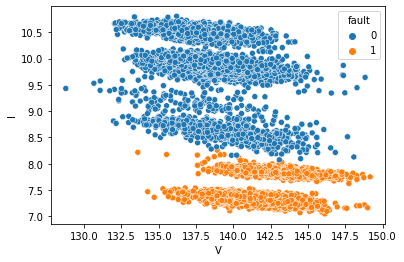

In [42]:
sns.scatterplot(x="V", y="I", hue="fault", data=test_total)

<AxesSubplot:xlabel='V', ylabel='I'>

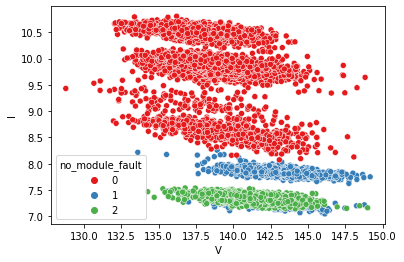

In [43]:
sns.scatterplot(x="V", y="I", hue="no_module_fault", data=test_total, palette='Set1')

<AxesSubplot:xlabel='V', ylabel='I'>

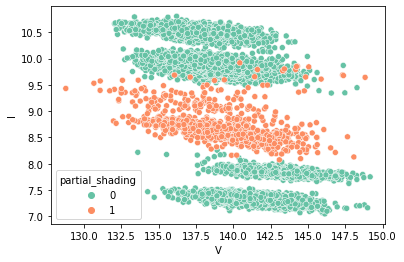

In [44]:
sns.scatterplot(x="V", y="I", hue="partial_shading", data=test_total, palette="Set2")

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


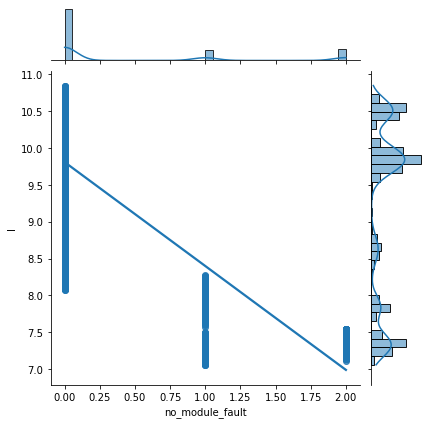

In [45]:
sns.jointplot("no_module_fault", "I", data=train_total, kind='reg');

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


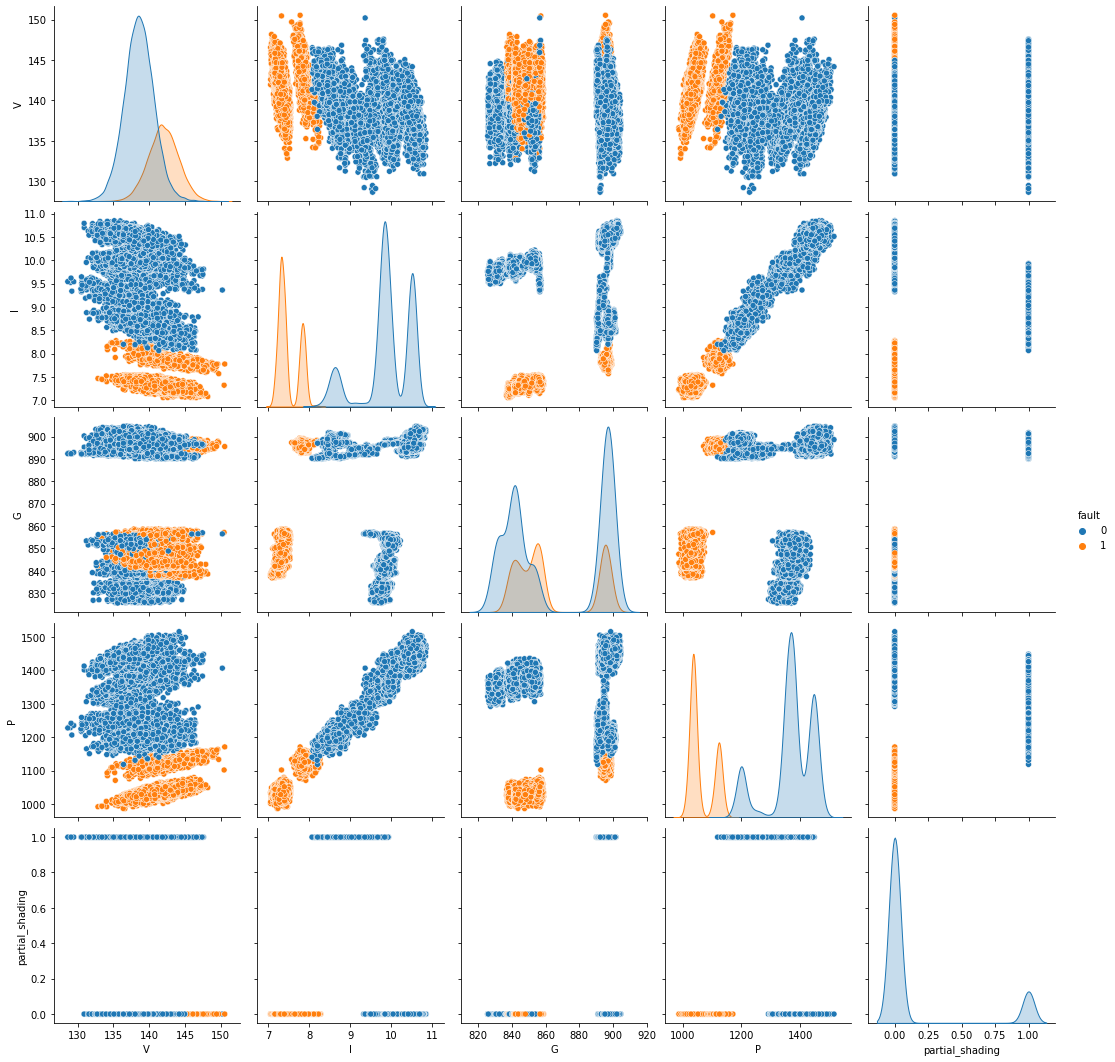

In [46]:
sns.pairplot(train_total.drop('no_module_fault', axis=1), hue='fault', size=3)

<AxesSubplot:>

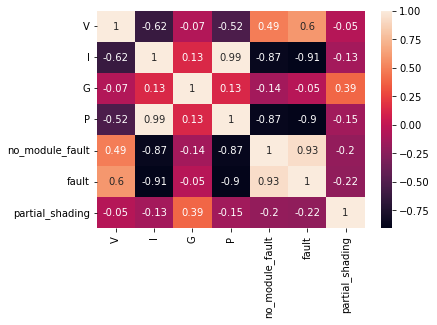

In [47]:
sns.heatmap(train_total.corr(), annot=True)

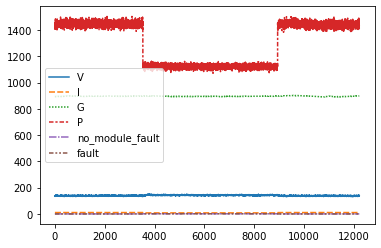

In [48]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
 
 
# reading the database
data = pd.read_csv("/kaggle/input/faults-data/Str1_3-Str2_2-LL1.csv")
 
# using only data attribute
sns.lineplot(data=data.drop(['partial_shading'], axis=1))
plt.show()

In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
train_shuffled = train_total.sample(frac=1)
train_shuffled_X = train_shuffled.drop(['no_module_fault', 'fault', 'partial_shading'], axis=1)
train_shuffled_y = train_shuffled['fault']
train_shuffled_y_partial = train_shuffled['partial_shading']
train_shuffled_y_modules = train_shuffled['no_module_fault']
print(train_shuffled_X)
print(train_shuffled_y)

               V         I          G            P
42834  142.17429   8.54531  900.73862  1214.923382
38701  139.21353   8.64678  899.47802  1203.748767
17654  139.53093   9.92430  852.85363  1384.746809
7172   143.95326   7.15601  838.07699  1030.130968
37441  139.85592  10.41738  897.91998  1456.932264
...          ...       ...        ...          ...
41004  136.26766  10.52211  896.20610  1433.823308
2270   136.43782   9.82679  830.82014  1340.745805
43096  136.93500   8.59938  895.72238  1177.556100
43988  136.68679  10.48480  896.45520  1433.133656
7570   141.08391   9.68401  840.51751  1366.257995

[45520 rows x 4 columns]
42834    0
38701    0
17654    0
7172     1
37441    0
        ..
41004    0
2270     0
43096    0
43988    0
7570     0
Name: fault, Length: 45520, dtype: int64


In [50]:
test_total_X = test_total.drop(['no_module_fault', 'fault', 'partial_shading'], axis=1)
test_total_y = test_total['fault']
test_total_y_partial = test_total['partial_shading']
test_total_y_modules = test_total['no_module_fault']
print(test_total_X)
print(test_total_y)

               V         I          G            P
0      137.07333   9.83519  834.93196  1348.142244
1      138.32728   9.83948  831.78800  1361.068505
2      138.38301   9.74598  830.85569  1348.678048
3      140.69814   9.74322  832.16548  1370.852932
4      136.10387   9.80300  829.76669  1334.226238
...          ...       ...        ...          ...
11375  141.23348   8.47980  891.09767  1197.631664
11376  137.65994  10.59528  894.64125  1458.545609
11377  142.42933   8.43963  892.32293  1202.050846
11378  139.22092   8.51587  898.25573  1185.587256
11379  136.55742  10.53301  900.13121  1438.360670

[11380 rows x 4 columns]
0        0
1        0
2        0
3        0
4        0
        ..
11375    0
11376    0
11377    0
11378    0
11379    0
Name: fault, Length: 11380, dtype: int64


In [51]:
from sklearn.naive_bayes import GaussianNB

model_GNB = GaussianNB()
model_GNB.fit(train_shuffled_X, train_shuffled_y)

GaussianNB()

In [52]:
predict_GNB = model_GNB.predict(test_total_X)
acc_GNB = accuracy_score(test_total_y, predict_GNB)
print("Accuracy:", acc_GNB*100, "%")

Accuracy: 99.77152899824253 %


In [53]:
model_GNB_partial = GaussianNB()
model_GNB_partial.fit(train_shuffled_X, train_shuffled_y_partial)

GaussianNB()

In [54]:
predict_GNB_partial = model_GNB_partial.predict(test_total_X)
acc_GNB_partial = accuracy_score(test_total_y_partial, predict_GNB_partial)
print("Accuracy:", acc_GNB_partial*100, "%")

Accuracy: 99.13005272407733 %


In [55]:
from sklearn.linear_model import LogisticRegression

model_LogReg = LogisticRegression()
model_LogReg.fit(train_shuffled_X, train_shuffled_y)

LogisticRegression()

In [56]:
predict_LogReg = model_LogReg.predict(test_total_X)
acc_LogReg = accuracy_score(test_total_y, predict_LogReg)
print("Accuracy:", acc_LogReg*100, "%")

Accuracy: 99.99121265377856 %


In [57]:
model_LogReg_partial = LogisticRegression()
model_LogReg_partial.fit(train_shuffled_X, train_shuffled_y_partial)

LogisticRegression()

In [58]:
predict_LogReg_partial = model_LogReg_partial.predict(test_total_X)
acc_LogReg_partial = accuracy_score(test_total_y_partial, predict_LogReg_partial)
print("Accuracy:", acc_LogReg_partial*100, "%" )

Accuracy: 93.84885764499121 %


In [59]:
from sklearn.tree import DecisionTreeClassifier

model_DT = DecisionTreeClassifier()
model_DT.fit(train_shuffled_X, train_shuffled_y)

DecisionTreeClassifier()

In [60]:
predict_DT = model_DT.predict(test_total_X)
acc_DT = accuracy_score(test_total_y, predict_DT)
print("Accuracy:", acc_DT*100, "%")
print("Precision:", precision_score(test_total_y, predict_DT)*100, "%")
print("Recall:", recall_score(test_total_y, predict_DT)*100, "%")
print("F1:", f1_score(test_total_y, predict_DT)*100, "%")

Accuracy: 99.98242530755712 %
Precision: 99.96982498491249 %
Recall: 99.96982498491249 %
F1: 99.96982498491249 %


In [61]:
#SVM MODEL ON OUR DATA 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
model = SVC()
model.fit(train_shuffled_X, train_shuffled_y)

SVC()

In [62]:
predict_model = model.predict(test_total_X)
acc_SVM = accuracy_score(test_total_y, predict_model)
print("Accuracy:", acc_SVM*100, "%")

Accuracy: 99.8945518453427 %


In [87]:
#KNN MODEL ON OUR DATA 
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

knn = KNeighborsClassifier(n_neighbors=7)
  

knn.fit(train_shuffled_X, train_shuffled_y)

KNeighborsClassifier(n_neighbors=7)

In [89]:
predict_knn = knn.predict(test_total_X)
acc_KNN = accuracy_score(test_total_y, predict_knn)
print("Accuracy:", acc_KNN*100, "%")

Accuracy: 100.0 %


[Text(0.6363636363636364, 0.9166666666666666, 'X[3] <= 1158.064\ngini = 0.419\nsamples = 45520\nvalue = [31924, 13596]'),
 Text(0.45454545454545453, 0.75, 'X[1] <= 8.297\ngini = 0.004\nsamples = 13613\nvalue = [25, 13588]'),
 Text(0.36363636363636365, 0.5833333333333334, 'X[1] <= 8.124\ngini = 0.002\nsamples = 13600\nvalue = [12, 13588]'),
 Text(0.18181818181818182, 0.4166666666666667, 'X[1] <= 8.063\ngini = 0.0\nsamples = 13550\nvalue = [1, 13549]'),
 Text(0.09090909090909091, 0.25, 'gini = 0.0\nsamples = 13530\nvalue = [0, 13530]'),
 Text(0.2727272727272727, 0.25, 'X[1] <= 8.067\ngini = 0.095\nsamples = 20\nvalue = [1, 19]'),
 Text(0.18181818181818182, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.36363636363636365, 0.08333333333333333, 'gini = 0.0\nsamples = 19\nvalue = [0, 19]'),
 Text(0.5454545454545454, 0.4166666666666667, 'X[2] <= 893.689\ngini = 0.343\nsamples = 50\nvalue = [11, 39]'),
 Text(0.45454545454545453, 0.25, 'gini = 0.0\nsamples = 11\nvalue 

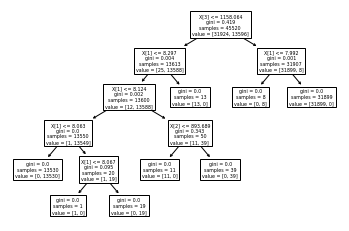

In [63]:
from sklearn import tree
tree.plot_tree(model_DT)

# import graphviz
# dot_data = tree.export_graphviz(model_DT, out_file=None)
# graph = graphviz.Source(dot_data) 
# graph.render("solar") 

In [64]:
model_DT_partial = DecisionTreeClassifier()
model_DT_partial.fit(train_shuffled_X, train_shuffled_y_partial)

DecisionTreeClassifier()

In [65]:
predict_DT_partial = model_DT_partial.predict(test_total_X)
acc_DT_partial = accuracy_score(test_total_y_partial, predict_DT_partial)
print("Accuracy:", acc_DT_partial*100, "%")
print("Precision:", precision_score(test_total_y_partial, predict_DT_partial)*100, "%")
print("Recall:", recall_score(test_total_y_partial, predict_DT_partial)*100, "%")
print("F1:", f1_score(test_total_y_partial, predict_DT_partial)*100, "%")

Accuracy: 100.0 %
Precision: 100.0 %
Recall: 100.0 %
F1: 100.0 %


[Text(0.4342105263157895, 0.9166666666666666, 'X[2] <= 896.687\ngini = 0.183\nsamples = 45520\nvalue = [40877, 4643]'),
 Text(0.15789473684210525, 0.75, 'X[2] <= 874.325\ngini = 0.083\nsamples = 36839\nvalue = [35250, 1589]'),
 Text(0.10526315789473684, 0.5833333333333334, 'gini = 0.0\nsamples = 26400\nvalue = [26400, 0]'),
 Text(0.21052631578947367, 0.5833333333333334, 'X[2] <= 892.325\ngini = 0.258\nsamples = 10439\nvalue = [8850, 1589]'),
 Text(0.10526315789473684, 0.4166666666666667, 'X[1] <= 9.95\ngini = 0.385\nsamples = 862\nvalue = [224, 638]'),
 Text(0.05263157894736842, 0.25, 'gini = 0.0\nsamples = 638\nvalue = [0, 638]'),
 Text(0.15789473684210525, 0.25, 'gini = 0.0\nsamples = 224\nvalue = [224, 0]'),
 Text(0.3157894736842105, 0.4166666666666667, 'X[1] <= 9.979\ngini = 0.179\nsamples = 9577\nvalue = [8626, 951]'),
 Text(0.2631578947368421, 0.25, 'X[1] <= 8.233\ngini = 0.336\nsamples = 4455\nvalue = [3504, 951]'),
 Text(0.21052631578947367, 0.08333333333333333, 'gini = 0.0\nsa

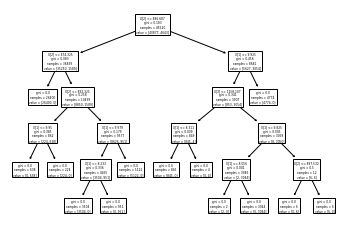

In [66]:
tree.plot_tree(model_DT_partial)

In [67]:
from sklearn.ensemble import RandomForestClassifier

model_RF = RandomForestClassifier()
model_RF.fit(train_shuffled_X, train_shuffled_y)

RandomForestClassifier()

In [68]:
predict_RF = model_RF.predict(test_total_X)
acc_RF = accuracy_score(test_total_y, predict_RF)
print("Accuracy:", acc_RF*100, "%")
print("Precision:", precision_score(test_total_y, predict_RF)*100, "%")
print("Recall:", recall_score(test_total_y, predict_RF)*100, "%")
print("F1:", f1_score(test_total_y, predict_RF)*100, "%")

Accuracy: 100.0 %
Precision: 100.0 %
Recall: 100.0 %
F1: 100.0 %


In [69]:
model_RF_partial = RandomForestClassifier()
model_RF_partial.fit(train_shuffled_X, train_shuffled_y_partial)

RandomForestClassifier()

In [70]:
predict_RF_partial = model_RF_partial.predict(test_total_X)
acc_RF_partial = accuracy_score(test_total_y_partial, predict_RF_partial)
print("Accuracy:", acc_RF_partial*100, "%")
print("Precision:", precision_score(test_total_y_partial, predict_RF_partial)*100, "%")
print("Recall:", recall_score(test_total_y_partial, predict_RF_partial)*100, "%")
print("F1:", f1_score(test_total_y_partial, predict_RF_partial)*100, "%")

Accuracy: 99.98242530755712 %
Precision: 99.82440737489026 %
Recall: 100.0 %
F1: 99.91212653778558 %


In [71]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score
# KF = KFold(10, True)
SSS = StratifiedKFold(n_splits=10)

In [72]:
total = pd.concat([train_total, test_total], ignore_index=True)
total_X = total.drop(['no_module_fault', 'fault', 'partial_shading'], axis=1)
total_y = total['fault']
total_y_partial = total['partial_shading']
total_y_modules = total['no_module_fault']
total_X.describe()

,V,I,G,P
count,56900.000000,56900.000000,56900.000000,56900.000000
mean,139.561242,9.176205,865.900578,1278.678733
std,2.606393,1.209647,26.898051,155.894604
min,128.633120,7.047240,825.585240,986.645824
25%,137.745132,7.838890,841.572510,1122.878942
50%,139.388985,9.768640,854.799790,1355.387947
75%,141.274195,10.020325,896.008627,1393.583022
max,150.549000,10.847240,904.615830,1515.478445


In [73]:
# Naive Bayes
model_GNB_crossval = GaussianNB()
predict_GNB_crossval = cross_val_score(model_GNB_crossval, total_X, total_y, cv=SSS.split(total_X, total_y))
avg_crossval_score_GNB = predict_GNB_crossval.mean()
print("Cross validated accuracies:", predict_GNB_crossval)
print("Average cross validated accuracy:", avg_crossval_score_GNB*100, "%")

Cross validated accuracies: [1.         1.         1.         1.         1.         0.99824253
 0.9943761  0.9943761  1.         0.99560633]
Average cross validated accuracy: 99.82601054481546 %


In [74]:
# Logistic Regression
model_LogReg_crossval = LogisticRegression()
predict_LogReg_crossval = cross_val_score(model_LogReg_crossval, total_X, total_y, cv=SSS.split(total_X, total_y))
avg_crossval_score_LogReg = predict_LogReg_crossval.mean()
print("Cross validated accuracies:", predict_LogReg_crossval)
print("Average cross validated accuracy:", avg_crossval_score_LogReg*100, "%")

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Cross validated accuracies: [1.         1.         1.         1.         1.         0.99982425
 0.99929701 0.99947276 1.         0.99982425]
Average cross validated accuracy: 99.98418277680142 %


In [75]:
# Decision Trees
model_DT_crossval = DecisionTreeClassifier()
predict_DT_crossval = cross_val_score(model_DT_crossval, total_X, total_y, cv=SSS.split(total_X, total_y))
avg_crossval_score_DT = predict_DT_crossval.mean()
print("Cross validated accuracies:", predict_DT_crossval)
print("Average cross validated accuracy:", avg_crossval_score_DT*100, "%")

Cross validated accuracies: [1.         1.         1.         1.         1.         0.99982425
 1.         0.99964851 1.         0.99964851]
Average cross validated accuracy: 99.99121265377855 %


In [76]:
# Random Forest
model_RF_crossval = RandomForestClassifier()
predict_RF_crossval = cross_val_score(model_RF_crossval, total_X, total_y, cv=SSS.split(total_X, total_y))
avg_crossval_score_RF = predict_RF_crossval.mean()
print("Cross validated accuracies:", predict_RF_crossval)
print("Average cross validated accuracy:", avg_crossval_score_RF*100, "%")

Cross validated accuracies: [1.         1.         1.         1.         1.         1.
 1.         0.99964851 1.         0.99982425]
Average cross validated accuracy: 99.99472759226714 %


In [77]:
# SVM
model_SV_crossval = SVC()
predict_SV_crossval = cross_val_score(model_SV_crossval, total_X, total_y, cv=SSS.split(total_X, total_y))
avg_crossval_score_SV = predict_SV_crossval.mean()
print("Cross validated accuracies:", predict_SV_crossval)
print("Average cross validated accuracy:", avg_crossval_score_SV*100, "%")

Cross validated accuracies: [1.         1.         1.         1.         1.         0.99947276
 0.9973638  0.99718805 1.         0.99789104]
Average cross validated accuracy: 99.91915641476274 %


In [91]:
# KNN
model_KN_crossval = KNeighborsClassifier(n_neighbors=7)
predict_KN_crossval = cross_val_score(model_KN_crossval, total_X, total_y, cv=SSS.split(total_X, total_y))
avg_crossval_score_KN = predict_KN_crossval.mean()
print("Cross validated accuracies:", predict_KN_crossval)
print("Average cross validated accuracy:", avg_crossval_score_KN*100, "%")

Cross validated accuracies: [1.         1.         1.         1.         1.         0.99982425
 0.99982425 0.99929701 1.         1.        ]
Average cross validated accuracy: 99.98945518453426 %


In [92]:
AccList = [['Naive Bayes', acc_GNB*100],
           ['Logistic Regression', acc_LogReg*100],
           ['Decision Tree', acc_DT*100],
           ['Random Forest', acc_RF*100],
          ['SVM',acc_SVM*100],
           ['KNN',acc_KNN*100]]
           

acc_results = pd.DataFrame(AccList, columns = ['Classification Model', 'Accuracy Score (%)'])
acc_results.sort_values(by=["Accuracy Score (%)"], inplace=True, ascending=False) # Sorting records in order of highest accuracy
acc_results.head()

,Classification Model,Accuracy Score (%)
3,Random Forest,100.000000
5,KNN,100.000000
1,Logistic Regression,99.991213
2,Decision Tree,99.982425
4,SVM,99.894552


In [93]:
# For cross-validated scores
AccList_Crossval = [['Naive Bayes', avg_crossval_score_GNB*100],
           ['Logistic Regression', avg_crossval_score_LogReg*100],
           ['Decision Tree', avg_crossval_score_DT*100],
           ['Random Forest', avg_crossval_score_RF*100],
               ['SVM', avg_crossval_score_SV*100] ,
                   ['KNN', avg_crossval_score_KN*100]]
          

acc_results = pd.DataFrame(AccList_Crossval, columns = ['Classification Model', 'Accuracy Score (%)'])
acc_results.sort_values(by=['Accuracy Score (%)'], inplace=True, ascending=False) # Sorting records in order of highest accuracy
acc_results.head()

,Classification Model,Accuracy Score (%)
3,Random Forest,99.994728
2,Decision Tree,99.991213
5,KNN,99.989455
1,Logistic Regression,99.984183
4,SVM,99.919156
